# Can we make a change on climate change?
#### EPA1333 Final Assignment

#### Angga Irawan (4516974), Priadi Teguh Wibowo (4625862)



# Introduction

Global temperature rise, warming oceans, shrinking ice sheets, sea level rise are some evidences that the climate is changing. The suspected main cause of this phenomena is the greenhouse effect generated by the certain type of gases such as, Nitrous oxide, Carbon dioxide, and Methane.    

The long term consequences of this phenomena will affect the future condition of the Earth. Temperature will continue to increase, changes of precipitation patterns, also potentially more heat waves and hurricanes.  

In this project assignment, we are going to try to inspect a data mainly from World Bank data, take a closer look to the data and build a model of the climate change phenomena to foresee what is going to happen in the near future if we do not change the latest trend of the environment system.

We will restrict our investigation to one of the most prominent evidence of the climate change: Global Temperature, global surface temperature anomaly to be more precise. It refers to the deviation of the observed temperature from the reference or long term average. This observation can be used as diagnostic quantity of global-scale climate [1].

We will analyse the dataset provided, perform a preliminary investigation to get a better understanding of the data and obtain the initial insight. We also will add the dataset with the information from another resources, do a selection of the appropiate information, and preprocess the data so that the data will not completely raw. 

Then, we could manipulate the data to form a so called features matrix and target vector and develop a model by using the various machine learning algorithm.

Furthermore, we could perform a prediction of the future condition and explore more the parameter of the model so that we get a better explanation why the condition turn to be so.      

<dl>
The following are several research questions we are going to try to answer to help our analysis keep on track.
<dd>1. Since when the climate change 'effectively' causing the global temperature anomaly to be warmer than the reference (1951-1980 average temperatures)? </dd>
<dd>2. Which factors is contributing the most to global temperature anomaly?</dd>
<dd>3. What will happen to global temperature anomaly if we do not change the trend of the latest condition? </dd>
</dl>

[1] https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php


# Data

## Climate change indicators
The climate change data offered by World Bank contains a large set of indicators, such as for example CO2 emissions, population growth or renewable energy output. Values of these indicators are available per country and per year. The data is available in this URL: https://data.worldbank.org/topic/climate-change. It is also complemented by two files of metadata.

Import standard library to prepare the reading and loading process of the data.

In [4]:
# import standard library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Load the World Bank data as a dataframe.

In [5]:
# load world bank data
# skip the unneeded header
wb = pd.read_csv('world_bank/API_19_DS2_en_csv_v2.csv', sep=',', header=0, skiprows=3) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb = wb.drop(wb.columns[[-1]], 1)

# display the head of dataframe
print("Dataframe shape:", wb.shape)
wb.head()


Dataframe shape: (21120, 61)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


The World Bank data consists of data for 57 years (1960-2016) of 264 countries with 80 indicators for each country. These data could be utilized as the initial data. 

### Countries Metadata

Load the additional csv file which contains the metadata of the countries on the main World Bank data.

In [6]:
#load country metadata
wb_meta_country = pd.read_csv('world_bank/Metadata_Country_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_country = wb_meta_country.drop(wb_meta_country.columns[[-1]], 1)

# display the head of dataframe
wb_meta_country.head()


,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra


### Indicator Metadata

We also have to include the another csv file containing the metadata of the indicator on the main World Bank data. 

In [7]:
#load indicator metadata
wb_meta_indi = pd.read_csv('world_bank/Metadata_Indicator_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_indi = wb_meta_indi.drop(wb_meta_indi.columns[[-1]], 1)

# display the head of dataframe
wb_meta_indi.head()


,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,SP.URB.TOTL.IN.ZS,Urban population (% of total),Urban population refers to people living in ur...,The United Nations Population Divisions World ...
1,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
2,SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
3,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
4,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Derived from total population. Population sour...


# Additional Data

We need additional data from other resources to assist the previous obtained data as the additional feature, a potential label/output for the classification/regression, or a ground truth for the prediction.

## Global Temperature Anomaly

Global Temperature Anomaly data is provided by NASA, https://climate.nasa.gov/vital-signs/global-temperature/. This graph below illustrates the change in global surface temperature relative to 1951-1980 average temperatures. Sixteen of the 17 warmest years in the 136-year record all have occurred since 2001, with the exception of 1998. The year 2016 ranks as the warmest on record.

Later, the global temperature anomaly from 1960 to 2016 will be used as target vector or output to be fitted in model.

In [8]:
df_tempe = pd.read_csv(
    'https://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt', 
    sep="     ", 
    names=['year', 'annual mean', '5 year mean'],
    index_col = 'year',
    engine ='python')

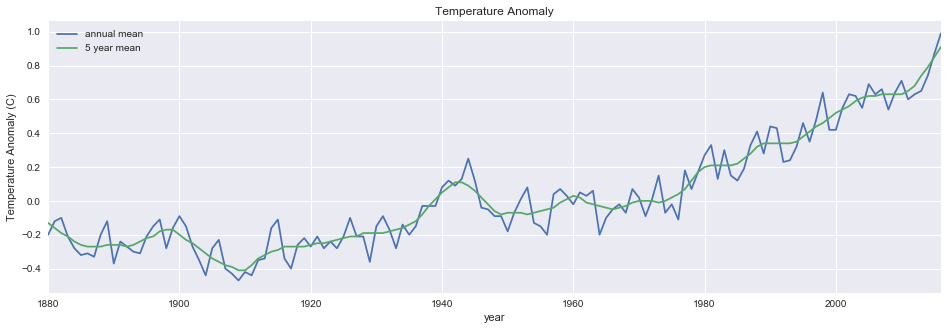

In [9]:
df_tempe.plot(figsize = (16,5))
plt.ylabel('Temperature Anomaly (C)')
plt.title('Temperature Anomaly')

In [582]:
# slice the range of year, make suitable with the world bank data (provided since 1960)
df_tempe.index.name = None
df_tempe_since_1960 = df_tempe[80:]
df_tempe_since_1960.head()

,annual mean,5 year mean
1960,-0.02,0.03
1961,0.05,0.02
1962,0.03,-0.01
1963,0.06,-0.02
1964,-0.20,-0.03


## Global Warming

We could find the start of the global warming approximately from the 5 years mean data when the anomaly is continuously higher than the temperature reference.

In [624]:
list_flag = []
for i in range(len(df_tempe_since_1960['5 year mean'])):
    list_flag.append(all(df_tempe_since_1960['5 year mean'][i:] > 0))

df_tempe_since_1960['5 year mean'][list_flag].index[0]

1975

## Climate Change Performance Index

Climate Change Performance Index (CCPI) is issued by Germanwatch and Climate Action Network Europe, https://germanwatch.org/en/13042. For the past 12 years, it has been keep tracking various countries’ efforts in combating climate change. On the basis of standardised criteria, the index evaluates and compares the climate protection performance of 58 countries that together are responsible for about 90% of global energy-related CO2 emissions. Unfortunately, we have to delete Taipei from the list as the World Bank data does not provide the data for the country.

This data can be used to filter out the raw data / World Bank data with only countries that has most contribution to CO2 emission. 

In [13]:
# load label Climate Change Performance Index
ccpi_country = pd.read_csv('CCPI/CCPI_2017.csv', sep=',', header=0) 

# rename the CCPI column to Country Name, so it could be 'merge' on this column name
ccpi_country.columns = ['Country Name', 'Category']
ccpi_country.head()

,Country Name,Category
0,France,Good
1,Sweden,Good
2,United Kingdom,Good
3,Cyprus,Good
4,Morocco,Good


# Preprocessing

Before jump in to the analysis of the data, we need to clean and preprocess the data first. 

## World Bank Data Interpolation

Many missing data are found in World Bank raw data. Thus, interpolation is performed to fill those missing data with appropriate values. We need to drop header and indicator of the dataframe so that we create a temporary dataframe with only numerical value of the World Bank data. We need this transformation to accomplish the interpolation.

In [14]:
# create column of years of the world bank data
years_column = wb.columns.values[range(4,61)]
years_column

# copy the content of the dataframe (to avoid copying the reference) for the interpolation
wb_prep = pd.DataFrame()
wb_prep = wb[years_column]

# reset the column (year) to integer
wb_prep.columns = range(0,57)

# display the dataframe
wb_prep.head(8)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.900000,97.800000,97.800000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000,NaN


As we can see from dataframe above, we have a particular row with NaN as its value, both partially or fully for entire row. We will perform the interpolation only to the partial one, see row 7 for an example.

In [626]:
# interpolate the data in row direction also in both direction within range limit
wb_interpolated = wb_prep.interpolate(method='linear',limit_direction='both',limit=56,axis=1)

In [137]:
# show the interpolation results
wb_interpolated.head(8)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.670000,50.654000,50.639000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,29253.000000,29416.000000,29575.000000,29738.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,0.586271,0.555661,0.539067,0.549628,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,57715.000000,58055.000000,58386.000000,58726.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,0.580642,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,...,97.900000,97.800000,97.800000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000


The row now are filled out by values from the interpolation results. As for the case where the entire row is completely fill out by NaN, we will handle it later. 

A new dataframe is created to accomodate the new interpolated values. 

In [17]:
# create a new dataframe to avoid overwriting the original dataframe
wb_inter = pd.DataFrame()
wb_inter = wb[wb.columns.values]

# replace wb_inter annual value with the interpolated one
wb_inter[list(wb.columns.values[range(4,61)])] = wb_interpolated[list(range(0,57))]

# now we have interpolated world bank data
wb_inter.head(8)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929
5,Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aruba,ABW,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Aruba,ABW,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,98.600000,98.600000,98.600000,98.600000,98.600000,98.600000,...,97.900000,97.800000,97.800000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000,97.700000


## Feature Selection

### Filter the World Bank data with CCPI countries

New dataframe which contains only the data from countries being mentioned in CCPI document is created.

In [19]:
# create a df of countries from CCPI results countries
df_ccpi = pd.DataFrame()
for country in ccpi_country['Country Name']:
    # filter the CCPI countries
    
    # not interpolated
    # df1 = wb[wb['Country Name'] == country]
    
    # take it from the interpolated one
    df1 = wb_inter[wb_inter['Country Name'] == country]

    # append to the df
    df_ccpi = pd.concat( [df_ccpi,df1], ignore_index=True, axis=0)
    
df_ccpi[:8]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,6.188000e+01,6.260700e+01,6.348900e+01,6.470200e+01,6.589800e+01,6.707100e+01,...,7.762100e+01,7.786400e+01,7.810600e+01,7.834500e+01,7.858400e+01,7.882000e+01,7.905500e+01,7.928900e+01,7.952000e+01,7.975000e+01
1,France,FRA,Urban population,SP.URB.TOTL,2.896865e+07,2.970374e+07,3.055068e+07,3.157696e+07,3.258617e+07,3.355144e+07,...,4.969004e+07,5.012494e+07,5.054008e+07,5.094580e+07,5.134897e+07,5.175305e+07,5.217517e+07,5.259394e+07,5.297946e+07,5.334965e+07
2,France,FRA,Urban population growth (annual %),SP.URB.GROW,2.424503e+00,2.505858e+00,2.811428e+00,3.304057e+00,3.146026e+00,2.919203e+00,...,9.335545e-01,8.714278e-01,8.248035e-01,7.995637e-01,7.882418e-01,7.838471e-01,8.123421e-01,7.994288e-01,7.303273e-01,6.963089e-01
3,France,FRA,"Population, total",SP.POP.TOTL,4.681424e+07,4.744475e+07,4.811965e+07,4.880368e+07,4.944940e+07,5.002377e+07,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
4,France,FRA,Population growth (annual %),SP.POP.GROW,1.229610e+00,1.337853e+00,1.412470e+00,1.411512e+00,1.314427e+00,1.154839e+00,...,6.187115e-01,5.588574e-01,5.144864e-01,4.940375e-01,4.836449e-01,4.839823e-01,5.146361e-01,5.038712e-01,4.394107e-01,4.074910e-01
5,France,FRA,Poverty headcount ratio at $1.90 a day (2011 P...,SI.POV.DDAY,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,...,0.000000e+00,0.000000e+00,5.000000e-02,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,France,FRA,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,France,FRA,Improved sanitation facilities (% of populatio...,SH.STA.ACSN,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,...,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01,9.870000e+01


## Data Cleaning

### Removing Missing Indicator (NaN for entire row)

Check the data for each country which the entire years of a indicator are missing. We will remove this indicator from the dataframe so that it will not affect the model negatively.

In [20]:
import operator

# saved indicator
list_deleted_indi = []
list_tuple_country_del_indi = []
for c, i in enumerate(range(0,4480,80)):
    # print(c, df_ccpi['Country Name'][i],df_ccpi[i:i+80].isnull().any(axis=1).sum())
    list_tuple_country_del_indi.append((df_ccpi['Country Name'][i], df_ccpi[i:i+80].isnull().any(axis=1).sum())) 
    for i in df_ccpi[i:i+80]['Indicator Name'][df_ccpi[i:i+80].isnull().any(axis=1)]:
        # print(i)
        list_deleted_indi.append(i)    

# list_tuple_country_del_indi.sort(key=operator.itemgetter(1))
df_tuple_cdi = pd.DataFrame(list_tuple_country_del_indi, columns = ['Country Name','Number of Missing Indicator'])
df_tuple_cdi = df_tuple_cdi.set_index('Country Name')
# df_tuple_cdi.plot(kind = 'bar', figsize=(16,4))


In [21]:
from bokeh.io import output_notebook
from bokeh.charts import Bar, show

output_notebook()
NA_per_country = Bar(df_tuple_cdi, 'Country Name', values='Number of Missing Indicator', 
        title="Number of Missing Indicator for Each Country",
        plot_width=900, plot_height=450, legend=False)
show(NA_per_country)

Loading BokehJS ...

In [22]:
from collections import Counter
deleted_indi_counts = Counter(list_deleted_indi)
df_dic = pd.DataFrame.from_dict(deleted_indi_counts, orient='index')
df_dic.columns = ['Number of Countries']

p = Bar(df_dic, values='Number of Countries', 
        title="Number of Countries which Missing the Indicator",
        plot_width=900, plot_height=700, legend=False)
show(p)


NameError: name 'df' is not defined

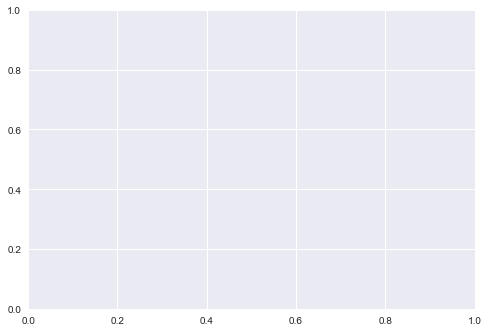

In [23]:
# Scatter
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Age'],df['Sales']) #You can also add more variables here to represent color and size.
plt.show()

Filter the data frame so it only consists of the indicators which are complete for the entire year (1960-2016).

In [25]:
len(set(list_deleted_indi))

24

We will have to remove 24 indicators from the data. It leaves us with the remaining 56 indicators.

In [26]:
df_ccpi_clean = pd.DataFrame()

# initialize the flag of saved indicator
array_flag = np.ones((len(df_ccpi)), dtype=bool)

# transfom it to series
series_flag = pd.Series(data = array_flag, index=range(len(df_ccpi)))

# filter the indicator
for indi in sorted(set(list_deleted_indi)):
    series_flag = (series_flag & (df_ccpi['Indicator Name'] != indi))

# filter the df
df_ccpi_clean_reset = df_ccpi[series_flag]

print('Number of row with missing value:', df_ccpi_clean_reset.isnull().any().sum())

Number of row with missing value: 0


As we could see from dataframe calculation above, we do not have missing value anymore.

## Feature Engineering

### Averaging and Summing the Features

We already have done preprocessing to our data, but to make it even more meaningful as the input features for the model we need to 'engineer' the data. We will sum up or re-average the data as the appropriate interaction to do based on the source note on the countries metadata. We might even remove the data if the data is considered as redundant or are already represented by another feature. The information of the metadata is concluded as the csv file below.  

In [27]:
df_feature_select = pd.read_csv('world_bank/feature_engineering.csv',sep=',', header=0) 

In [28]:
df_feature_select.head()

,Indicator Name,Feature Interaction
0,Urban population (% of total),remove
1,Urban population,sum
2,Urban population growth (annual %),average
3,"Population, total",sum
4,Population growth (annual %),average


In [29]:
df_ccpi_feature_label = pd.merge(df_ccpi_clean_reset, df_feature_select, 
                                 on = 'Indicator Name', how="inner")

print('Dataframe shape:', df_ccpi_feature_label.shape)
df_ccpi_feature_label.head()

Dataframe shape: (2907, 62)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Feature Interaction
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,61.880,62.607,63.489,64.702,65.898,67.071,...,77.864,78.106,78.345,78.584,78.820,79.055,79.289,79.520,79.750,remove
1,Sweden,SWE,Urban population (% of total),SP.URB.TOTL.IN.ZS,72.490,73.295,74.271,75.223,76.153,77.056,...,84.746,84.902,85.056,85.210,85.363,85.514,85.665,85.815,85.964,remove
2,United Kingdom,GBR,Urban population (% of total),SP.URB.TOTL.IN.ZS,78.444,78.374,78.237,78.099,77.960,77.821,...,80.757,81.031,81.302,81.570,81.834,82.092,82.345,82.592,82.835,remove
3,Cyprus,CYP,Urban population (% of total),SP.URB.TOTL.IN.ZS,35.628,36.175,36.674,37.176,37.681,38.188,...,67.839,67.695,67.551,67.406,67.261,67.133,67.019,66.921,66.840,remove
4,Morocco,MAR,Urban population (% of total),SP.URB.TOTL.IN.ZS,29.357,29.849,30.345,30.846,31.353,31.862,...,56.665,57.175,57.684,58.191,58.697,59.200,59.699,60.195,60.685,remove


In [30]:
df_ccpi_feature_label_removed = df_ccpi_feature_label [df_ccpi_feature_label['Feature Interaction'] != 'remove']
print('Dataframe shape:', df_ccpi_feature_label_removed.shape)
df_ccpi_feature_label_removed.head()

Dataframe shape: (2451, 62)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Feature Interaction
57,France,FRA,Urban population,SP.URB.TOTL,28968650.0,29703735.0,30550684.0,31576957.0,32586168.0,33551445.0,...,50124942.0,50540084.0,50945804.0,51348967.0,51753046.0,52175170.0,52593945.0,52979459.0,53349647.0,sum
58,Sweden,SWE,Urban population,SP.URB.TOTL,5425627.0,5511783.0,5616067.0,5720204.0,5834351.0,5959398.0,...,7813274.0,7894625.0,7976659.0,8051674.0,8126023.0,8209668.0,8306173.0,8409171.0,8513120.0,sum
59,United Kingdom,GBR,Urban population,SP.URB.TOTL,41104656.0,41381472.0,41661202.0,41900114.0,42098400.0,42294196.0,...,49913475.0,50463084.0,51030310.0,51600299.0,52128504.0,52644143.0,53205707.0,53791229.0,54370607.0,sum
60,Cyprus,CYP,Urban population,SP.URB.TOTL,204124.0,208511.0,211862.0,214845.0,218032.0,221859.0,...,733722.0,743343.0,751577.0,758206.0,763454.0,767932.0,772266.0,776943.0,782112.0,sum
61,Morocco,MAR,Urban population,SP.URB.TOTL,3619287.0,3793971.0,3973623.0,4157495.0,4344630.0,4533658.0,...,17904358.0,18290224.0,18695176.0,19120878.0,19565934.0,20024263.0,20487552.0,20949860.0,21407718.0,sum


The number of features to be summed.

In [31]:
set_indi_sum = set(df_ccpi_feature_label_removed[df_ccpi_feature_label_removed['Feature Interaction'] == 'sum']['Indicator Name'])
len(set_indi_sum)

14

The number of features to be averaged.

In [32]:
set_indi_average = set(df_ccpi_feature_label_removed[df_ccpi_feature_label_removed['Feature Interaction'] == 'average']['Indicator Name'])
len(set_indi_average)

29

Generate new engineered dataframe. First we append the dataframe with the averaged features. 

In [679]:
df_ccpi_feature_processed = pd.DataFrame()

for indi in set_indi_average:
    df_indi = df_ccpi_feature_label_removed[(df_ccpi_feature_label_removed['Feature Interaction'] == 'average') & (df_ccpi_feature_label_removed['Indicator Name'] == indi)]
    df_indi_ave = (df_indi.sum(axis = 0)) 
    
    df_ccpi_feature_processed[indi] = df_indi_ave[4:-1]/len(ccpi_country)
    
print('Dataframe shape:',df_ccpi_feature_processed.shape)    
df_ccpi_feature_processed.head()

Dataframe shape: (57, 29)


,"Annual freshwater withdrawals, total (% of internal resources)","Improved water source, urban (% of urban population with access)",Population growth (annual %),"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",Electricity production from hydroelectric sources (% of total),CO2 emissions (kg per 2010 US$ of GDP),Arable land (% of land area),Nitrous oxide emissions (% change from 1990),Electricity production from nuclear sources (% of total),Access to electricity (% of population),...,CO2 emissions (kg per 2011 PPP $ of GDP),Energy use (kg of oil equivalent per capita),Marine protected areas (% of territorial waters),CO2 emissions (metric tons per capita),Renewable electricity output (% of total electricity output),Improved water source (% of population with access),Average precipitation in depth (mm per year),Urban population growth (annual %),Terrestrial and marine protected areas (% of total territorial area),"Mortality rate, under-5 (per 1,000 live births)"
1960,78.6085,98.0737,1.73957,180.797,33.5841,0.879245,22.9618,-1.81816,2.40717,94.5262,...,0.46768,2131.99,4.42281,5.56605,21.6549,94.1754,928.316,3.12379,5.06895,76.6982
1961,78.6085,98.0737,1.54375,180.797,33.4155,0.876465,22.9618,-1.81816,2.41497,94.5262,...,0.46768,2147.36,4.42281,5.60803,21.6549,94.1754,928.316,2.97242,5.06895,74.9947
1962,78.6085,98.0737,1.53823,180.797,32.6826,0.865212,22.8923,-1.81816,2.43068,94.5262,...,0.46768,2189.16,4.42281,5.75007,21.6549,94.1754,928.316,3.00569,5.06895,73.3667
1963,78.6085,98.0737,1.5221,180.797,32.8665,0.859848,22.8414,-1.81816,2.46789,94.5262,...,0.46768,2246.68,4.42281,5.92478,21.6549,94.1754,928.316,2.99205,5.06895,71.8053
1964,78.6085,98.0737,1.50488,180.797,31.7092,0.849144,22.7635,-1.81816,2.5329,94.5262,...,0.46768,2294.52,4.42281,6.12698,21.6549,94.1754,928.316,2.96685,5.06895,70.2456


Calculate and append the summed features. 

In [680]:
for indi in set_indi_sum:
    df_indi = df_ccpi_feature_label_removed[(df_ccpi_feature_label_removed['Feature Interaction'] == 'sum') & (df_ccpi_feature_label_removed['Indicator Name'] == indi)]
    df_indi_sum = df_indi.sum(axis = 0)
    
    df_ccpi_feature_processed[indi] = df_indi_sum[4:-1]
    
print('Dataframe shape:',df_ccpi_feature_processed.shape)    
df_ccpi_feature_processed.head()

Dataframe shape: (57, 43)


,"Annual freshwater withdrawals, total (% of internal resources)","Improved water source, urban (% of urban population with access)",Population growth (annual %),"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",Electricity production from hydroelectric sources (% of total),CO2 emissions (kg per 2010 US$ of GDP),Arable land (% of land area),Nitrous oxide emissions (% change from 1990),Electricity production from nuclear sources (% of total),Access to electricity (% of population),...,Agricultural land (sq. km),SF6 gas emissions (thousand metric tons of CO2 equivalent),"Annual freshwater withdrawals, total (billion cubic meters)",CO2 emissions (kt),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Urban population,Forest area (sq. km),"Population, total",HFC gas emissions (thousand metric tons of CO2 equivalent),Total greenhouse gas emissions (kt of CO2 equivalent)
1960,78.6085,98.0737,1.73957,180.797,33.5841,0.879245,22.9618,-1.81816,2.40717,94.5262,...,3.04398e+07,107782,2347.8,1.06706e+07,1.71553e+06,8.82316e+08,2.87375e+07,2.42165e+09,74836.7,2.15698e+07
1961,78.6085,98.0737,1.54375,180.797,33.4155,0.876465,22.9618,-1.81816,2.41497,94.5262,...,3.04398e+07,107782,2347.8,1.05782e+07,1.71553e+06,9.0571e+08,2.87375e+07,2.44721e+09,74836.7,2.15698e+07
1962,78.6085,98.0737,1.53823,180.797,32.6826,0.865212,22.8923,-1.81816,2.43068,94.5262,...,3.04956e+07,107782,2347.8,1.0736e+07,1.71553e+06,9.31088e+08,2.87375e+07,2.48411e+09,74836.7,2.15698e+07
1963,78.6085,98.0737,1.5221,180.797,32.8665,0.859848,22.8414,-1.81816,2.46789,94.5262,...,3.0559e+07,107782,2347.8,1.10676e+07,1.71553e+06,9.59149e+08,2.87375e+07,2.53265e+09,74836.7,2.15698e+07
1964,78.6085,98.0737,1.50488,180.797,31.7092,0.849144,22.7635,-1.81816,2.5329,94.5262,...,3.0608e+07,107782,2347.8,1.1395e+07,1.71553e+06,9.8775e+08,2.87375e+07,2.58106e+09,74836.7,2.15698e+07


# Training Set

In this step, input feature matrix and target vector are established from previously loaded data to train the model of Linear Regression.

## Feature Matrix

Input matrix is obtained from world bank data, with rows as year from 1960 to 2016 and columns as indicators for each countries.

In [691]:
X_tempe_train = df_ccpi_feature_processed[df_ccpi_feature_processed.columns.values]
X_tempe_train['years'] = X_tempe_train.index

dataset_tempe = X_tempe_train[X_tempe_train.columns.values]

print('Dataframe shape:', dataset_tempe.shape)
dataset_tempe.head()

Dataframe shape: (57, 44)


,"Annual freshwater withdrawals, total (% of internal resources)","Improved water source, urban (% of urban population with access)",Population growth (annual %),"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",Electricity production from hydroelectric sources (% of total),CO2 emissions (kg per 2010 US$ of GDP),Arable land (% of land area),Nitrous oxide emissions (% change from 1990),Electricity production from nuclear sources (% of total),Access to electricity (% of population),...,SF6 gas emissions (thousand metric tons of CO2 equivalent),"Annual freshwater withdrawals, total (billion cubic meters)",CO2 emissions (kt),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Urban population,Forest area (sq. km),"Population, total",HFC gas emissions (thousand metric tons of CO2 equivalent),Total greenhouse gas emissions (kt of CO2 equivalent),years
1960,78.6085,98.0737,1.73957,180.797,33.5841,0.879245,22.9618,-1.81816,2.40717,94.5262,...,107782,2347.8,1.06706e+07,1.71553e+06,8.82316e+08,2.87375e+07,2.42165e+09,74836.7,2.15698e+07,1960
1961,78.6085,98.0737,1.54375,180.797,33.4155,0.876465,22.9618,-1.81816,2.41497,94.5262,...,107782,2347.8,1.05782e+07,1.71553e+06,9.0571e+08,2.87375e+07,2.44721e+09,74836.7,2.15698e+07,1961
1962,78.6085,98.0737,1.53823,180.797,32.6826,0.865212,22.8923,-1.81816,2.43068,94.5262,...,107782,2347.8,1.0736e+07,1.71553e+06,9.31088e+08,2.87375e+07,2.48411e+09,74836.7,2.15698e+07,1962
1963,78.6085,98.0737,1.5221,180.797,32.8665,0.859848,22.8414,-1.81816,2.46789,94.5262,...,107782,2347.8,1.10676e+07,1.71553e+06,9.59149e+08,2.87375e+07,2.53265e+09,74836.7,2.15698e+07,1963
1964,78.6085,98.0737,1.50488,180.797,31.7092,0.849144,22.7635,-1.81816,2.5329,94.5262,...,107782,2347.8,1.1395e+07,1.71553e+06,9.8775e+08,2.87375e+07,2.58106e+09,74836.7,2.15698e+07,1964


## Target Vector

Target vector is global temperature anomaly from 1960 to 2016.

In [692]:
y_tempe_train = df_tempe_since_1960['annual mean'].values
# y_tempe_train = df_tempe_since_1960['5 year mean'].values
print('Dataframe shape:', y_tempe_train.shape)
y_tempe_train

Dataframe shape: (57,)


array([-0.02,  0.05,  0.03,  0.06, -0.2 , -0.1 , -0.05, -0.02, -0.07,
        0.07,  0.02, -0.09,  0.01,  0.15, -0.07, -0.02, -0.11,  0.18,
        0.07,  0.17,  0.27,  0.33,  0.13,  0.3 ,  0.15,  0.12,  0.19,
        0.33,  0.41,  0.28,  0.44,  0.43,  0.23,  0.24,  0.32,  0.46,
        0.35,  0.48,  0.64,  0.42,  0.42,  0.55,  0.63,  0.62,  0.55,
        0.69,  0.63,  0.66,  0.54,  0.64,  0.71,  0.6 ,  0.63,  0.65,
        0.74,  0.87,  0.99])

### Concatenate the target to the main matrix

In [693]:
dataset_tempe['annual mean'] = y_tempe_train
dataset_tempe['5 year mean'] =  df_tempe_since_1960['5 year mean'].values
print('Dataframe shape:', dataset_tempe.shape)
dataset_tempe.head()

Dataframe shape: (57, 46)


,"Annual freshwater withdrawals, total (% of internal resources)","Improved water source, urban (% of urban population with access)",Population growth (annual %),"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",Electricity production from hydroelectric sources (% of total),CO2 emissions (kg per 2010 US$ of GDP),Arable land (% of land area),Nitrous oxide emissions (% change from 1990),Electricity production from nuclear sources (% of total),Access to electricity (% of population),...,CO2 emissions (kt),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Urban population,Forest area (sq. km),"Population, total",HFC gas emissions (thousand metric tons of CO2 equivalent),Total greenhouse gas emissions (kt of CO2 equivalent),years,annual mean,5 year mean
1960,78.6085,98.0737,1.73957,180.797,33.5841,0.879245,22.9618,-1.81816,2.40717,94.5262,...,1.06706e+07,1.71553e+06,8.82316e+08,2.87375e+07,2.42165e+09,74836.7,2.15698e+07,1960,-0.02,0.03
1961,78.6085,98.0737,1.54375,180.797,33.4155,0.876465,22.9618,-1.81816,2.41497,94.5262,...,1.05782e+07,1.71553e+06,9.0571e+08,2.87375e+07,2.44721e+09,74836.7,2.15698e+07,1961,0.05,0.02
1962,78.6085,98.0737,1.53823,180.797,32.6826,0.865212,22.8923,-1.81816,2.43068,94.5262,...,1.0736e+07,1.71553e+06,9.31088e+08,2.87375e+07,2.48411e+09,74836.7,2.15698e+07,1962,0.03,-0.01
1963,78.6085,98.0737,1.5221,180.797,32.8665,0.859848,22.8414,-1.81816,2.46789,94.5262,...,1.10676e+07,1.71553e+06,9.59149e+08,2.87375e+07,2.53265e+09,74836.7,2.15698e+07,1963,0.06,-0.02
1964,78.6085,98.0737,1.50488,180.797,31.7092,0.849144,22.7635,-1.81816,2.5329,94.5262,...,1.1395e+07,1.71553e+06,9.8775e+08,2.87375e+07,2.58106e+09,74836.7,2.15698e+07,1964,-0.20,-0.03


## Generating the Model

In [694]:
from sklearn.linear_model import LinearRegression
lr_tempe = LinearRegression(fit_intercept=True)
lr_tempe.fit(X_tempe_train, y_tempe_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [695]:
from sklearn.ensemble import RandomForestRegressor

max_depth = 30
regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=2)
regr_rf.fit(X_tempe_train, y_tempe_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [696]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_tempe_train, y_tempe_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predict the anomaly temperature

In [697]:
dataset_tempe['LR prediction'] = lr_tempe.predict(X_tempe_train)
dataset_tempe['RFR prediction'] = regr_rf.predict(X_tempe_train)
dataset_tempe['SVR prediction'] = svr_rbf.predict(X_tempe_train)
print('Dataframe shape:', dataset_tempe.shape)
dataset_tempe.head()

Dataframe shape: (57, 49)


,"Annual freshwater withdrawals, total (% of internal resources)","Improved water source, urban (% of urban population with access)",Population growth (annual %),"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",Electricity production from hydroelectric sources (% of total),CO2 emissions (kg per 2010 US$ of GDP),Arable land (% of land area),Nitrous oxide emissions (% change from 1990),Electricity production from nuclear sources (% of total),Access to electricity (% of population),...,Forest area (sq. km),"Population, total",HFC gas emissions (thousand metric tons of CO2 equivalent),Total greenhouse gas emissions (kt of CO2 equivalent),years,annual mean,5 year mean,LR prediction,RFR prediction,SVR prediction
1960,78.6085,98.0737,1.73957,180.797,33.5841,0.879245,22.9618,-1.81816,2.40717,94.5262,...,2.87375e+07,2.42165e+09,74836.7,2.15698e+07,1960,-0.02,0.03,-0.144994,-0.013,0.079867
1961,78.6085,98.0737,1.54375,180.797,33.4155,0.876465,22.9618,-1.81816,2.41497,94.5262,...,2.87375e+07,2.44721e+09,74836.7,2.15698e+07,1961,0.05,0.02,0.062762,0.027,0.149867
1962,78.6085,98.0737,1.53823,180.797,32.6826,0.865212,22.8923,-1.81816,2.43068,94.5262,...,2.87375e+07,2.48411e+09,74836.7,2.15698e+07,1962,0.03,-0.01,0.042090,0.035,0.129867
1963,78.6085,98.0737,1.5221,180.797,32.8665,0.859848,22.8414,-1.81816,2.46789,94.5262,...,2.87375e+07,2.53265e+09,74836.7,2.15698e+07,1963,0.06,-0.02,0.173909,0.057,0.159867
1964,78.6085,98.0737,1.50488,180.797,31.7092,0.849144,22.7635,-1.81816,2.5329,94.5262,...,2.87375e+07,2.58106e+09,74836.7,2.15698e+07,1964,-0.20,-0.03,-0.176086,-0.108,-0.100133


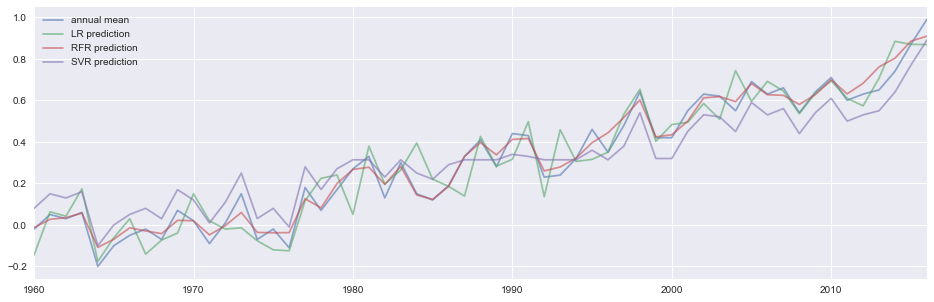

In [698]:
dataset_tempe[['annual mean', 'LR prediction', 'RFR prediction', 'SVR prediction']].plot(figsize = (16,5), alpha=0.6);

## Analysis

In [699]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

target_int = (dataset_tempe['annual mean']*100).astype(int)

# create a base classifier used to evaluate a subset of attributes
RFEmodel = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(RFEmodel, 7)
rfe = rfe.fit(X_tempe_train, target_int) #dataset_tempe.target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True False False  True False False
  True  True False  True False False  True False]
[16 17 35 13 21 36 26 14 27 19 34 28 37  8 20 29 24 22 23 38  9 30 33 25 18
 12 32 31 15  1  1  7  4  1  6 10  1  1  2  1  3  5  1 11]


In [700]:
X_tempe_train.columns[rfe.support_]

Index(['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Methane emissions (kt of CO2 equivalent)',
       'Agricultural land (sq. km)', 'CO2 emissions (kt)',
       'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
       'Forest area (sq. km)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)'],
      dtype='object')

After doing Recrusive Feature Elimination on our dataset, indicators which has most significant contribution to global temperature anomaly can be discovered. We found top seven indicators, which are:

* **Nitrous oxide emissions (thousand metric tons of CO<sub>2</sub> equivalent)**
<dd> While it contributes only 5 percent of US greenhouse gas emission in 2015. But according to EPA, the impact of 1 pound of N<sub>2</sub>O on warming the atmosphere is almost 300 times that of 1 pound of carbon dioxide [1]. </dd>


* **Methane emissions (kt of CO<sub>2</sub> equivalent)**
<dd> Pound for pound, the comparative impact of CH<sub>4</sub> is more than 25 times greater than CO<sub>2</sub> over a 100-year period [1]. Though it only contributes only 10 percent of US greenhouse gas emission in 2015.</dd>


* **Forest area (sq. km)**
<dd> As described by plot ..... , the trend of forest area in the world is decreasing. It means that deforestation keeps happening around the world. In accordance with World Carfree Network (WCN) [3], deforestation contributes to 15 percent of global carbon dioxide emissions</dd>


* **Agricultural land (sq. km)**
<dd> Agriculture actually contributes to climate change. At every stage of agricultural process, some greenhouse gases are released into atmosphere. For example, Nitrous Oxide is emitted when people use synthetic fertilizers to the soil or domestic livestock such as cattle also produce a large amount of methane </dd>


* **Other greenhouse gas emissions, HFC, PFC and SF<sub>6</sub> (thousand metric tons of CO<sub>2</sub> equivalent)**
<dd> This group of gases is also called Fluorinated gases. Although, it has only small portion around 3 percent [1]. They are  referred to as High Global Warming Potential gases. One of the reason is their ability to deplete stratospheric ozone substances.</dd>


* **Total greenhouse gas emissions (kt of CO<sub>2</sub> equivalent)**
<dd>As known to many people, execessive greenhouse gas emission is the main cause of global warming and conseqeuntly climate change. This effect is caused due to these gases having greenhouse effect, or trapping heat from sunlight in the atmosphere.  The most abundant greenhouse gases in Earth's atmosphere are water vapor, carbon dioxide, methane, nitrous oxide, ozone, chlorofluorocarbons and Hydrofluorocarbons [2].</dd>


* **CO<sub>2</sub> emissions (kt)**
<dd> Carbon dioxide is the primary greenhouse gas emitted by human activites. The main sources are electricity, transportation and Industry [1]. </dd>


[1] https://www.epa.gov/ghgemissions/overview-greenhouse-gases

[2] https://en.wikipedia.org/wiki/Greenhouse_gas#Global_warming_potential

[3] https://www.scientificamerican.com/article/deforestation-and-global-warming/

# Prediction on the Future Condition

## Global temperature anomaly in the near future

In [773]:
# y_tempe_train = df_tempe_since_1960['annual mean'].values
y_tempe_train = df_tempe_since_1960['5 year mean'].values

regr_rf.fit(X_tempe_train, y_tempe_train)
lr_tempe.fit(X_tempe_train, y_tempe_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [774]:
dataset_tempe.head()

,"Annual freshwater withdrawals, total (% of internal resources)","Improved water source, urban (% of urban population with access)",Population growth (annual %),"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",Electricity production from hydroelectric sources (% of total),CO2 emissions (kg per 2010 US$ of GDP),Arable land (% of land area),Nitrous oxide emissions (% change from 1990),Electricity production from nuclear sources (% of total),Access to electricity (% of population),...,Forest area (sq. km),"Population, total",HFC gas emissions (thousand metric tons of CO2 equivalent),Total greenhouse gas emissions (kt of CO2 equivalent),years,annual mean,5 year mean,LR prediction,RFR prediction,SVR prediction
1960,78.6085,98.0737,1.73957,180.797,33.5841,0.879245,22.9618,-1.81816,2.40717,94.5262,...,2.87375e+07,2.42165e+09,74836.7,2.15698e+07,1960,-0.02,0.03,-0.144994,-0.013,0.079867
1961,78.6085,98.0737,1.54375,180.797,33.4155,0.876465,22.9618,-1.81816,2.41497,94.5262,...,2.87375e+07,2.44721e+09,74836.7,2.15698e+07,1961,0.05,0.02,0.062762,0.027,0.149867
1962,78.6085,98.0737,1.53823,180.797,32.6826,0.865212,22.8923,-1.81816,2.43068,94.5262,...,2.87375e+07,2.48411e+09,74836.7,2.15698e+07,1962,0.03,-0.01,0.042090,0.035,0.129867
1963,78.6085,98.0737,1.5221,180.797,32.8665,0.859848,22.8414,-1.81816,2.46789,94.5262,...,2.87375e+07,2.53265e+09,74836.7,2.15698e+07,1963,0.06,-0.02,0.173909,0.057,0.159867
1964,78.6085,98.0737,1.50488,180.797,31.7092,0.849144,22.7635,-1.81816,2.5329,94.5262,...,2.87375e+07,2.58106e+09,74836.7,2.15698e+07,1964,-0.20,-0.03,-0.176086,-0.108,-0.100133


In [775]:
X_tempe_train_extend = X_tempe_train[X_tempe_train.columns.values]

start_pred = 2017
end_pred = 2020
duration = end_pred - start_pred + 1
years_prediction = list(range(start_pred, end_pred+1))

for col in X_tempe_train_extend:
    X_tempe_train_extend[col] = pd.to_numeric(X_tempe_train_extend[col], errors='coerce')

for year in years_prediction:
    X_tempe_train_extend.loc[str(year)] = np.nan

In [776]:
X_tempe_train_extend.tail()

,"Annual freshwater withdrawals, total (% of internal resources)","Improved water source, urban (% of urban population with access)",Population growth (annual %),"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",Electricity production from hydroelectric sources (% of total),CO2 emissions (kg per 2010 US$ of GDP),Arable land (% of land area),Nitrous oxide emissions (% change from 1990),Electricity production from nuclear sources (% of total),Access to electricity (% of population),...,SF6 gas emissions (thousand metric tons of CO2 equivalent),"Annual freshwater withdrawals, total (billion cubic meters)",CO2 emissions (kt),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Urban population,Forest area (sq. km),"Population, total",HFC gas emissions (thousand metric tons of CO2 equivalent),Total greenhouse gas emissions (kt of CO2 equivalent),years
2016,114.687544,99.092982,0.684366,117.927415,17.497912,0.466405,19.463938,-11.241722,11.720901,99.15516,...,157294.0,3029.193,3.087725e+07,3.927714e+06,3.052724e+09,28698350.7,5.176758e+09,752891.0,4.258431e+07,2016.0
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [777]:
X_tempe_train_extend_reset = X_tempe_train_extend.reset_index(drop=True)
X_tempe_train_extend_reset.columns = [i for i in range(X_tempe_train_extend.shape[1])]
X_tempe_train_extend_reset.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,78.608465,98.073684,1.739566,180.797194,33.584052,0.879245,22.961799,-1.818165,2.407170,94.526218,...,107782.2,2347.8043,1.067059e+07,1.715532e+06,882316470.0,28737522.6,2.421652e+09,74836.7,2.156976e+07,1960.0
1,78.608465,98.073684,1.543751,180.797194,33.415501,0.876465,22.961799,-1.818165,2.414968,94.526218,...,107782.2,2347.8043,1.057820e+07,1.715532e+06,905710295.0,28737522.6,2.447208e+09,74836.7,2.156976e+07,1961.0
2,78.608465,98.073684,1.538230,180.797194,32.682597,0.865212,22.892274,-1.818165,2.430680,94.526218,...,107782.2,2347.8043,1.073600e+07,1.715532e+06,931087583.0,28737522.6,2.484107e+09,74836.7,2.156976e+07,1962.0
3,78.608465,98.073684,1.522099,180.797194,32.866506,0.859848,22.841383,-1.818165,2.467890,94.526218,...,107782.2,2347.8043,1.106762e+07,1.715532e+06,959149008.0,28737522.6,2.532651e+09,74836.7,2.156976e+07,1963.0
4,78.608465,98.073684,1.504883,180.797194,31.709222,0.849144,22.763537,-1.818165,2.532898,94.526218,...,107782.2,2347.8043,1.139499e+07,1.715532e+06,987749569.0,28737522.6,2.581059e+09,74836.7,2.156976e+07,1964.0


In [778]:
X_tempe_train_extend_reset.index = range(1960,2021)
X_tempe_train_extend_reset

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
1960,78.608465,98.073684,1.739566,180.797194,33.584052,0.879245,22.961799,-1.818165,2.407170,94.526218,...,107782.200000,2347.804300,1.067059e+07,1.715532e+06,8.823165e+08,28737522.6,2.421652e+09,74836.70,2.156976e+07,1960.0
1961,78.608465,98.073684,1.543751,180.797194,33.415501,0.876465,22.961799,-1.818165,2.414968,94.526218,...,107782.200000,2347.804300,1.057820e+07,1.715532e+06,9.057103e+08,28737522.6,2.447208e+09,74836.70,2.156976e+07,1961.0
1962,78.608465,98.073684,1.538230,180.797194,32.682597,0.865212,22.892274,-1.818165,2.430680,94.526218,...,107782.200000,2347.804300,1.073600e+07,1.715532e+06,9.310876e+08,28737522.6,2.484107e+09,74836.70,2.156976e+07,1962.0
1963,78.608465,98.073684,1.522099,180.797194,32.866506,0.859848,22.841383,-1.818165,2.467890,94.526218,...,107782.200000,2347.804300,1.106762e+07,1.715532e+06,9.591490e+08,28737522.6,2.532651e+09,74836.70,2.156976e+07,1963.0
1964,78.608465,98.073684,1.504883,180.797194,31.709222,0.849144,22.763537,-1.818165,2.532898,94.526218,...,107782.200000,2347.804300,1.139499e+07,1.715532e+06,9.877496e+08,28737522.6,2.581059e+09,74836.70,2.156976e+07,1964.0
1965,78.608465,98.073684,1.440715,180.797194,32.046088,0.843603,22.680345,-1.818165,2.611569,94.526218,...,107782.200000,2347.804300,1.173369e+07,1.715532e+06,1.011444e+09,28737522.6,2.630310e+09,74836.70,2.156976e+07,1965.0
1966,78.608465,98.073684,1.396625,180.797194,32.225465,0.841434,22.627037,-1.818165,2.671434,94.526218,...,107782.200000,2347.804300,1.210476e+07,1.715532e+06,1.035539e+09,28737522.6,2.682169e+09,74836.70,2.156976e+07,1966.0
1967,78.608465,98.073684,1.352069,180.797194,31.456523,0.830502,22.594507,-1.818165,2.709143,94.526218,...,107782.200000,2347.804300,1.234884e+07,1.715532e+06,1.059694e+09,28737522.6,2.733019e+09,74836.70,2.156976e+07,1967.0
1968,78.608465,98.073684,1.283904,180.797194,30.722779,0.850058,22.572024,-1.818165,2.731780,94.526218,...,107782.200000,2347.804300,1.282867e+07,1.715532e+06,1.083646e+09,28737522.6,2.784249e+09,74836.70,2.156976e+07,1968.0
1969,78.608465,98.073684,1.264270,180.797194,29.947730,0.848173,22.569040,-1.818165,2.823772,94.526218,...,107782.200000,2347.804300,1.343142e+07,1.715532e+06,1.109246e+09,28737522.6,2.839369e+09,74836.70,2.156976e+07,1969.0


In [779]:
X_tempe_train_extend_inter = X_tempe_train_extend_reset.interpolate(method='pchip',limit_direction='both',limit=duration,axis=0)
X_tempe_train_extend_inter.tail()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2016,114.687544,99.092982,0.684366,117.927415,17.497912,0.466405,19.463938,-11.241722,11.720901,99.15516,...,157294.0,3029.193,3.087725e+07,3.927714e+06,3.052724e+09,28698350.7,5.176758e+09,752891.0,4.258431e+07,2016.0
2017,114.687544,99.092982,0.692006,117.927415,17.497912,0.466405,19.463938,-11.241722,11.720901,99.15516,...,157294.0,3029.193,3.087725e+07,3.927714e+06,3.105085e+09,28698350.7,5.219384e+09,752891.0,4.258431e+07,2017.0
2018,114.687544,99.092982,0.697725,117.927415,17.497912,0.466405,19.463938,-11.241722,11.720901,99.15516,...,157294.0,3029.193,3.087725e+07,3.927714e+06,3.157430e+09,28698350.7,5.262227e+09,752891.0,4.258431e+07,2018.0
2019,114.687544,99.092982,0.701196,117.927415,17.497912,0.466405,19.463938,-11.241722,11.720901,99.15516,...,157294.0,3029.193,3.087725e+07,3.927714e+06,3.209759e+09,28698350.7,5.305286e+09,752891.0,4.258431e+07,2019.0
2020,114.687544,99.092982,0.702088,117.927415,17.497912,0.466405,19.463938,-11.241722,11.720901,99.15516,...,157294.0,3029.193,3.087725e+07,3.927714e+06,3.262071e+09,28698350.7,5.348560e+09,752891.0,4.258431e+07,2020.0


In [780]:
dataset_tempe_extend = X_tempe_train_extend_inter[list(range(0,X_tempe_train_extend_inter.shape[1]))]
dataset_tempe_extend.columns = X_tempe_train_extend.columns
dataset_tempe_extend.index = X_tempe_train_extend.index
dataset_tempe_extend.tail()

,"Annual freshwater withdrawals, total (% of internal resources)","Improved water source, urban (% of urban population with access)",Population growth (annual %),"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)",Electricity production from hydroelectric sources (% of total),CO2 emissions (kg per 2010 US$ of GDP),Arable land (% of land area),Nitrous oxide emissions (% change from 1990),Electricity production from nuclear sources (% of total),Access to electricity (% of population),...,SF6 gas emissions (thousand metric tons of CO2 equivalent),"Annual freshwater withdrawals, total (billion cubic meters)",CO2 emissions (kt),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Urban population,Forest area (sq. km),"Population, total",HFC gas emissions (thousand metric tons of CO2 equivalent),Total greenhouse gas emissions (kt of CO2 equivalent),years
2016,114.687544,99.092982,0.684366,117.927415,17.497912,0.466405,19.463938,-11.241722,11.720901,99.15516,...,157294.0,3029.193,3.087725e+07,3.927714e+06,3.052724e+09,28698350.7,5.176758e+09,752891.0,4.258431e+07,2016.0
2017,114.687544,99.092982,0.692006,117.927415,17.497912,0.466405,19.463938,-11.241722,11.720901,99.15516,...,157294.0,3029.193,3.087725e+07,3.927714e+06,3.105085e+09,28698350.7,5.219384e+09,752891.0,4.258431e+07,2017.0
2018,114.687544,99.092982,0.697725,117.927415,17.497912,0.466405,19.463938,-11.241722,11.720901,99.15516,...,157294.0,3029.193,3.087725e+07,3.927714e+06,3.157430e+09,28698350.7,5.262227e+09,752891.0,4.258431e+07,2018.0
2019,114.687544,99.092982,0.701196,117.927415,17.497912,0.466405,19.463938,-11.241722,11.720901,99.15516,...,157294.0,3029.193,3.087725e+07,3.927714e+06,3.209759e+09,28698350.7,5.305286e+09,752891.0,4.258431e+07,2019.0
2020,114.687544,99.092982,0.702088,117.927415,17.497912,0.466405,19.463938,-11.241722,11.720901,99.15516,...,157294.0,3029.193,3.087725e+07,3.927714e+06,3.262071e+09,28698350.7,5.348560e+09,752891.0,4.258431e+07,2020.0


In [781]:
dataset_tempe_extend['RFR future prediction'] = lr_tempe.predict(X_tempe_train_extend_inter)
# dataset_tempe_extend['RFR future prediction'] = regr_rf.predict(X_tempe_train_extend_inter)

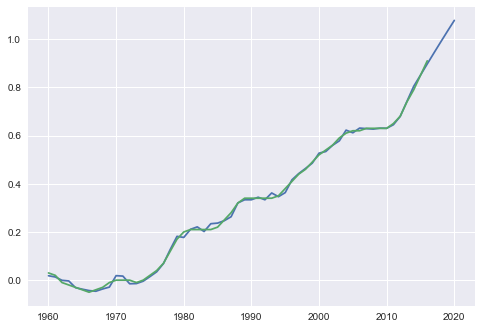

In [783]:
plt.plot(dataset_tempe_extend.index.values, dataset_tempe_extend['RFR future prediction'])
plt.plot(dataset_tempe.index, dataset_tempe['5 year mean'])
plt.alpha = 0.1
plt.figsize = (16,5)